# Hydrometer Recognition

Esse projeto é dedicado a criar um modelo que reconheça leituras de hidrometros a partir de fotos.

In [1]:
# Maths and operations
import os, random ,pathlib, sys, re
import numpy as np
import pandas as pd


# Data vis
import matplotlib.pyplot as plt
import seaborn as sns

# Computer vision
import cv2

# Machine learning

## Loading Data

In [2]:
# Creating some paths to open files
current_path = os.getcwd()
data_path = current_path + '/data' + '/raw_data/'
image_path = data_path + 'images/'
mask_path = data_path + 'masks/'
coll_path = data_path + 'collage/'

In [3]:
# Opening the CSV
df = pd.read_csv(data_path + 'data.csv')
df.head()

,photo_name,value,location
0,id_53_value_595_825.jpg,595.825,"{'type': 'polygon', 'data': [{'x': 0.30788, 'y..."
1,id_553_value_65_475.jpg,65.475,"{'type': 'polygon', 'data': [{'x': 0.26133, 'y..."
2,id_407_value_21_86.jpg,21.860,"{'type': 'polygon', 'data': [{'x': 0.27545, 'y..."
3,id_252_value_313_322.jpg,313.322,"{'type': 'polygon', 'data': [{'x': 0.21967, 'y..."
4,id_851_value_305_162.jpg,305.162,"{'type': 'polygon', 'data': [{'x': 0.06983, 'y..."


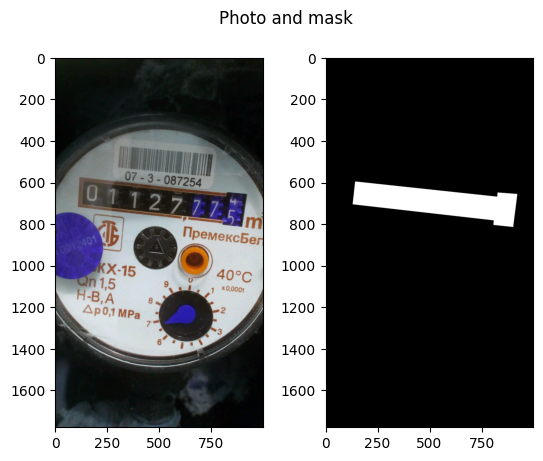

In [13]:
# Opening a random image from the folder -- Run this cell multiple times
random_choise = random.choice(os.listdir(image_path)) # Random choise a name from the files
random_image = cv2.imread(image_path+random_choise)
random_mask = cv2.imread(mask_path+random_choise)

# Plotting image and mask side by side
fig, ax = plt.subplots(1, 2)
fig.suptitle('Photo and mask')
ax[0].imshow(random_image)
ax[1].imshow(random_mask)
plt.show()

## Preprocessing

In [5]:
# Create function to extract polygon locations from 'location' column
def location_vals(obvs:str, x_or_y:str):
    '''
    Function uses regular expressions to parse the "location" string for each observation.
    Inputs are "obvs" and "x_or_y".

    obvs: This simply serves as the string being passed into the function.
    x_or_y: If "x" is entered, then the function extracts all "x" location values. If anything else, then it extracts "y" location values.
    '''
    if x_or_y == 'x':
        x = re.findall(r"\'x\': ([0-9.]*),", obvs)
        return x
    else:
        y = re.findall(r"\'y\': ([0-9.]*)}", obvs)
        return y

# Create new column with x and y location values.
df['x_location'] = df['location'].apply(lambda obvs: location_vals(obvs, 'x'))
df['y_location'] = df['location'].apply(lambda obvs: location_vals(obvs, 'y'))

In [7]:
# Function to open a image
def open_image(image_path:str):
    '''
    Function uses cv2 to open a image
    Input is "image_path"
    '''
    image = cv2.imread(image_path)
    return image

# Function to resize the image
def resize_image(image_path:str, size:tuple=(640, 640)):
    resized_image = cv2.resize(image_path, size)
    return resized_image

# Applying to every photo in the dataframe
df['images'] = df['photo_name'].apply(lambda x: resize_image(image_path=open_image(image_path + x), size=(640,640)))

In [10]:
df.head()

,photo_name,value,location,x_location,y_location,images
0,id_53_value_595_825.jpg,595.825,"{'type': 'polygon', 'data': [{'x': 0.30788, 'y...","[0.30788, 0.30676, 0.53501, 0.53445, 0.56529, ...","[0.30207, 0.32731, 0.33068, 0.33699, 0.33741, ...","[[[5, 12, 8], [3, 9, 8], [3, 9, 8], [3, 9, 8],..."
1,id_553_value_65_475.jpg,65.475,"{'type': 'polygon', 'data': [{'x': 0.26133, 'y...","[0.26133, 0.31405, 0.31741, 0.30676, 0.33985, ...","[0.24071, 0.23473, 0.26688, 0.26763, 0.60851, ...","[[[183, 199, 222], [182, 198, 221], [183, 199,..."
2,id_407_value_21_86.jpg,21.860,"{'type': 'polygon', 'data': [{'x': 0.27545, 'y...","[0.27545, 0.37483, 0.38935, 0.28185]","[0.19134, 0.18282, 0.76071, 0.76613]","[[[24, 34, 98], [19, 32, 98], [17, 33, 100], [..."
3,id_252_value_313_322.jpg,313.322,"{'type': 'polygon', 'data': [{'x': 0.21967, 'y...","[0.21967, 0.70811, 0.70008, 0.21699]","[0.50845, 0.53256, 0.61295, 0.58883]","[[[65, 84, 89], [63, 84, 90], [59, 83, 90], [5..."
4,id_851_value_305_162.jpg,305.162,"{'type': 'polygon', 'data': [{'x': 0.06983, 'y...","[0.06983, 0.34763, 0.34663, 0.36622, 0.37125, ...","[0.43491, 0.42285, 0.41795, 0.41607, 0.4628, 0...","[[[79, 86, 95], [76, 83, 92], [73, 81, 87], [7..."


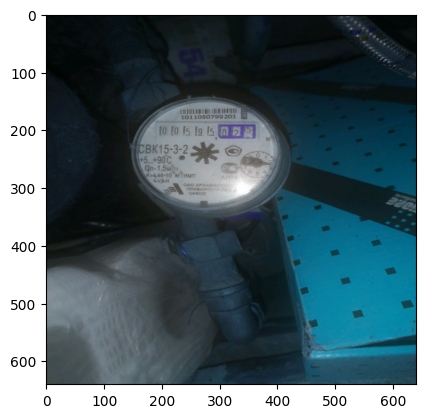

In [12]:
plt.imshow(df['images'][0])
plt.show()

In [ ]:
# Function to resize the image
def resize_image(image_path:str, size:tuple=(640, 640)):
    resized_image = cv2.resize(image_path, size)
    return resized_image

## Model